### import matplotlib.pylab as plts
%pylab inline

In [2]:
import pandas as pd

In [3]:
trn = pd.read_csv("oil-price-train.csv")
trn.head()

,Date,Price
0,05/15/1987,18.58
1,06/15/1987,18.86
2,07/15/1987,19.86
3,08/15/1987,18.98
4,09/15/1987,18.31


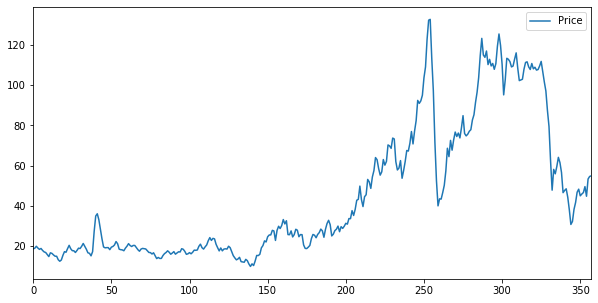

In [4]:
#plot(trn['Date'],trn['Price'])
trn.plot(figsize = (10, 5))
data = trn['Price'].values

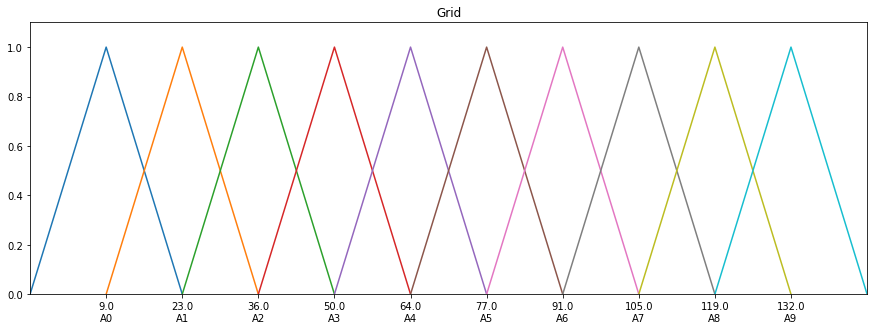

In [5]:
from pyFTS.partitioners import Grid

fs = Grid.GridPartitioner(data=data,npart=10)

fig, ax = plts.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

In [6]:
fuzzyfied = fs.fuzzyfy(data, method='maximum', mode='sets')

#fuzzyfied

In [7]:
from pyFTS.common import FLR

patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)

print([str(k) for k in patterns])

['A1 -> A1', 'A1 -> A0', 'A0 -> A1', 'A0 -> A0', 'A1 -> A2', 'A2 -> A2', 'A2 -> A1', 'A2 -> A3', 'A3 -> A3', 'A3 -> A2', 'A3 -> A4', 'A4 -> A4', 'A4 -> A3', 'A4 -> A5', 'A5 -> A5', 'A5 -> A4', 'A5 -> A6', 'A6 -> A6', 'A6 -> A7', 'A7 -> A7', 'A7 -> A8', 'A8 -> A9', 'A9 -> A9', 'A9 -> A8', 'A8 -> A6', 'A6 -> A5', 'A5 -> A3', 'A8 -> A8', 'A8 -> A7', 'A7 -> A6']


In [8]:
from pyFTS.models import chen

model = chen.ConventionalFTS(partitioner=fs)
model.fit(data)
print(model)

Conventional FTS:
A0 -> A0,A1
A1 -> A0,A1,A2
A2 -> A1,A2,A3
A3 -> A2,A3,A4
A4 -> A3,A4,A5
A5 -> A3,A4,A5,A6
A6 -> A5,A6,A7
A7 -> A6,A7,A8
A8 -> A6,A7,A8,A9
A9 -> A8,A9



In [9]:
tst = pd.read_csv("oil-price-test.csv")

In [10]:
prc = tst['Price'].values

In [11]:
tst.head()

,Date,Price
0,03/15/2017,51.59
1,04/15/2017,52.31
2,05/15/2017,50.33
3,06/15/2017,46.37
4,07/15/2017,48.48


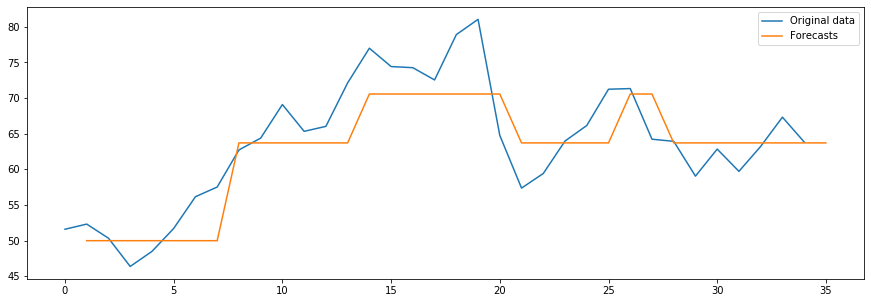

In [15]:
fig, ax = plts.subplots(nrows=1, ncols=1, figsize=[15,5])

forecasts = model.predict(prc)
forecasts.insert(0,None)

orig, = plot(prc, label="Original data")
pred, = plot(forecasts, label="Forecasts")

legend(handles=[orig, pred])

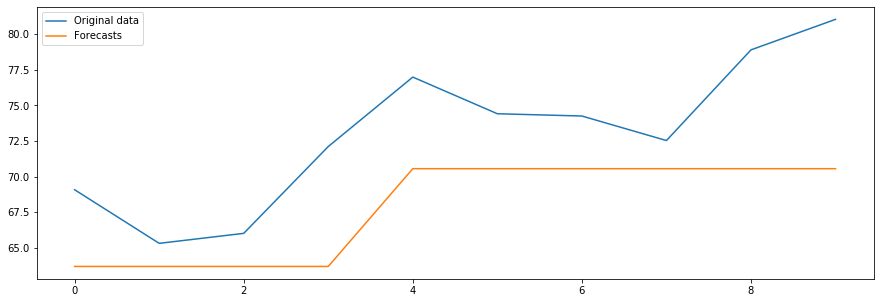

In [16]:
fig, ax = plts.subplots(nrows=1, ncols=1, figsize=[15,5])

forecasts = model.predict(prc)
forecasts.insert(0,None)

orig, = plot(prc[10:20], label="Original data")
pred, = plot(forecasts[10:20], label="Forecasts")

legend(handles=[orig, pred])